PART 1: In this part you will implement the  ℓ2 -regularized least squares linear regression algorithm we have been discussing (ridge regression). Recall from the lectures that this takes the form:

wRR=argminw∥y−Xw∥2+λ∥w∥2. 

Your task will be to write code that takes in data  y  and  X  and outputs  wRR  for an arbitrary value of  λ .

PART 2: In the same code, you will also implement the active learning procedure discussed in Lecture 5. For this problem, we will provide you with an arbitrary setting of  λ  and  σ2  and ask you to provide us with the first 10 locations you would measure from a set  D={x}  given a set of measured pairs (y, X). Please look over the slides carefully to remind yourself about the sequential evolution of the sets  D  and (y,X).

In [3]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathXtest = os.getcwd() + '\TestSet\X_test.csv'
pathXtrain = os.getcwd() + '\TestSet\X_train.csv'
pathYtrain = os.getcwd() + '\TestSet\Y_train.csv'

In [217]:
def error(X, y, weights):
    n = len(X[:,0])
    return np.linalg.norm(y - np.dot(X,weights))/n
def analyticalWeights(X, y, lam):
    aux = np.dot(X.T,X)
    n = aux.shape[0]
    W = np.dot(np.dot(np.linalg.inv(lam*np.identity(n) + aux), X.T), y)
    err = error(X, y, W)
    return W, err
def gradientWeights(X, y, lam, alpha, N_iter):
    n = float(len(X[:,0]))
    W = np.zeros((len(X[0,:]),1))
    for i in range(N_iter):
        y_pred = np.dot(X, W)
        g0 = np.sum(y_pred - y)/n
        g1 = np.sum(X[:,1]*(y_pred - y))/n
        W[0] -= alpha*g0
        W[1] -= alpha*g1
        #ADAPT FOR HIGHER DIMENSIONS!!
        
        err = error(X, y, W)
        #xplt=[0,20]
        #plt.plot(xplt, W[1]*xplt+W[0])
        #plt.pause(0.2)
        #print("Gradient {0}th iteration error = {1}".format(i, error(X, y, W)))
    return W, err

Least Squares:

[[2.82934921]
 [0.77517   ]]
[[0.01986172]
 [1.04274023]]
Analytical error = 0.18387160991135792
Gradient error = 0.8245866259396584


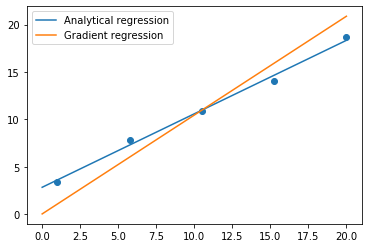

In [228]:
x = np.linspace(1, 20, 5)
x = x.reshape(x.shape[0],1)
y = np.sqrt(10*x+np.exp(0.25*x))
fig0, ax0 = plt.subplots(1)
ax0.scatter(x, y)

x = np.concatenate((np.ones((x.shape[0], 1), float), x), axis=1)

WlsAnal, errA = analyticalWeights(x, y, 0)
WlsGra, errG = gradientWeights(x, y, 0, 0.001, 100)
print(WlsAnal)
print(WlsGra)
print("Analytical error = {0}".format(errA))
print("Gradient error = {0}".format(errG))

xplt = np.array([0,20])
ax0.plot(xplt, WlsAnal[1]*xplt+WlsAnal[0], label="Analytical regression")
ax0.plot(xplt, WlsGra[1]*xplt+WlsGra[0], label="Gradient regression")
plt.legend()
plt.show()

In [202]:
X_test = pd.read_csv(pathXtest, header=None)
Y = pd.read_csv(pathYtrain, header=None)
X = pd.read_csv(pathXtrain, header=None)
#X.insert(loc=0, column='b', value=1)
X.columns = ["x2", "x1", "b"]
Y.columns = ["y"]
#Xinv = X[["b","x1","x2"]]

In [204]:
X.head()

,x2,x1,b
0,0.657192,0.707838,1.0
1,0.841374,0.165887,1.0
2,0.261518,0.578101,1.0
3,0.293537,0.186930,1.0
4,0.784798,0.844337,1.0


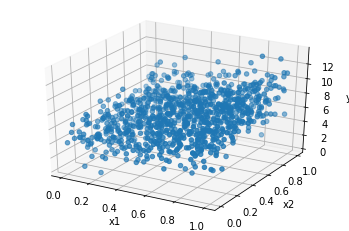

In [161]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(X["x1"], X["x2"], Y)
#ax.plot_wireframe(X0, Y0, Z0)
#ax.plot_wireframe(x, y, Z)
#ax.plot_surface(X, Y, Z)
#ax.contour(X, Y, Z)

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')

plt.show()

In [249]:
WlsAnal, erAnal = analyticalWeights(X.to_numpy(), Y.to_numpy(), 2)
WlsGra, erGra = gradientWeights(X.to_numpy(), Y.to_numpy(), 2, 0.005, 20)
print(WlsAnal)
print(WlsGra)
print("Analytical error = {0}".format(erAnal))
print("Gradient error = {0}".format(erGra))

[[1.97039193]
 [2.89106098]
 [4.00697261]]
[[ 0.02374838]
 [12.44424783]
 [ 0.        ]]
Analytical error = 0.055223018651236876
Gradient error = 0.10251861674717488


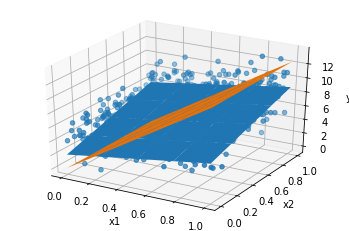

In [242]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(X["x1"], X["x2"], Y)

x0 = np.linspace(0,1, 5)
y0 = np.linspace(0,1, 5)
x0, y0 = np.meshgrid(x0, y0)

P = WlsAnal
z0 = P[0]+P[1]*x0+P[2]*y0
ax3.plot_surface(x0, y0, z0, label="Analytical plane")
P = WlsGra
z0 = P[0]+P[1]*x0+P[2]*y0
ax3.plot_surface(x0, y0, z0, label="Analytical plane")


ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
plt.show()

Ridge Regression: Part I

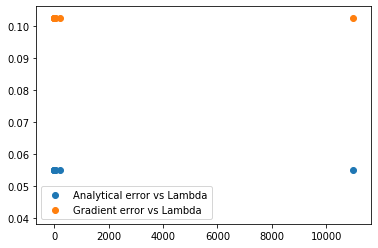

In [247]:
L = []
AnalyticalE = []
GradientE = []
N = 10
for i in range(N):
    l = 10**np.random.uniform(-5, 5)
    Wrr0, erAnal = analyticalWeights(X.to_numpy(), Y.to_numpy(), 0)
    Wrr1, erGra = gradientWeights(X.to_numpy(), Y.to_numpy(), l, 0.005, 20)
    
    L.append(l)
    AnalyticalE.append(erAnal)
    GradientE.append(erGra)

figrr, axrr = plt.subplots(1)
axrr.scatter(L, AnalyticalE, label="Analytical error vs Lambda")
axrr.scatter(L, GradientE, label="Gradient error vs Lambda")
plt.legend()
plt.show()

Active Learning: Part II